In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("play_tennis.csv")

In [7]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['play'] = le.fit_transform(df['play'])
df['wind'] = le.fit_transform(df['wind'])
df['humidity'] = le.fit_transform(df['humidity'])
print(df['play'].unique())
print(df['wind'].unique())
print(df['humidity'].unique())
for i, label in enumerate(le.classes_):
    print(f"{i}= {label}")

[0 1]
[1 0]
[0 1]
0= High
1= Normal


In [21]:
df

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [22]:
# memisahkan fitur dan label
x = df.drop(['day', 'play'], axis=1)
y = df['play']

In [25]:
# membagi data menjadi training dan testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=0)

In [26]:
# membuka dan melatih model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

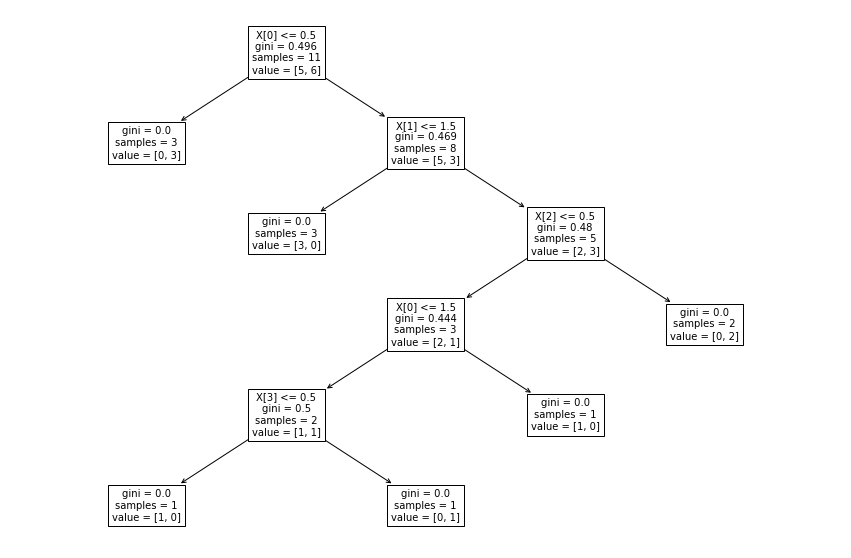

In [27]:
from sklearn import tree
plt.subplots(figsize = (15,10))
tree.plot_tree(classifier, fontsize = 10)
plt.show()

In [28]:
depth = classifier.get_depth()
depth

5

In [29]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
akurasi = accuracy_score(y_test, y_pred)
akurasi

0.3333333333333333